# Just Some Viz

In [1]:
# importing the libraries
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

BASE_DIR = os.path.dirname(os.getcwd())

## Top 20 Death by Coronavirus

Source: [Worldometer](https://www.worldometers.info/coronavirus/)<br>
Date: 2 April 2023

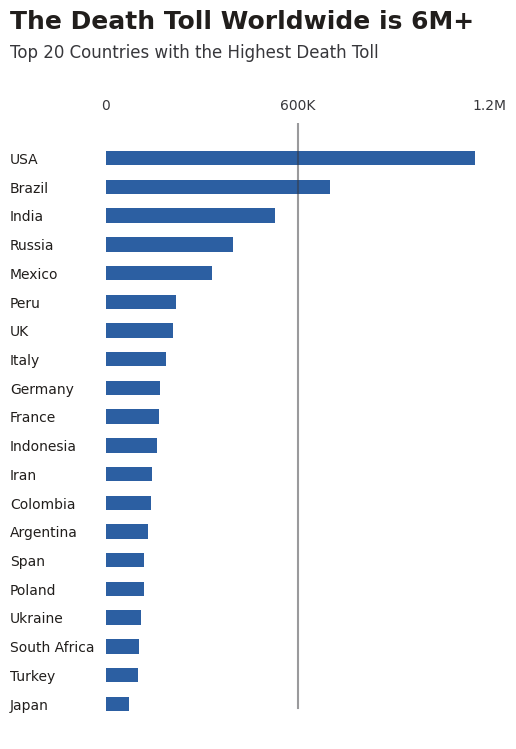

In [2]:
# load the data
top20_deaths = pd.read_csv(os.path.join(BASE_DIR, 'data', 'top20_deathsbycovid.csv')).sort_values(by='total_deaths', ascending=True)

# create the figure and axes
fig, ax = plt.subplots(figsize=(5, 8))

# plot the data
ax.barh(top20_deaths['country'], 
        top20_deaths['total_deaths'],
        height=0.5,
        color='#2c5fa2')

# remove the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# set the xticks
ax.set_xticks([0, 600000, 1200000])
ax.set_xticklabels(['0', '600K', '1.2M'])
ax.xaxis.tick_top()

ax.tick_params(top=False, left=False) # remove the ticks

ax.tick_params(axis='x', colors='#37373b') # set the color of the ticks
ax.tick_params(axis='y', colors='#211e1c') # set the color of the ticks

# set the title
ax.text(x=-300000, y=23.5,
        s='The Death Toll Worldwide is 6M+',
        weight='bold', size=18,
        color='#211e1c')
# set the subtitle
ax.text(x=-300000, y=22.5,
        s='Top 20 Countries with the Highest Death Toll',
        size=12,
        color='#37373b')

# set the labels
ax.set_yticklabels([])
for i, country in zip(range(20), top20_deaths['country']):
    ax.text(x=-300000, y=i-0.2,
            s=country,
            color='#211e1c')

# set the reference line
ax.axvline(x=600000, ymin=0.05, color='#37373b', alpha=0.5)

plt.show()

## Covid-19 Deaths in Indonesia

Source: [World Health Organization](https://covid19.who.int/)<br>
Date: 2 April 2023

In [3]:
# load the data
indonesia_case = pd.read_pickle(os.path.join(BASE_DIR, 'data', 'covid_deaths_indonesia.pkl'))

# extract the year and month
indonesia_case["year"] = indonesia_case["Date_reported"].dt.year
indonesia_case["month"] = indonesia_case["Date_reported"].dt.month
indonesia_case["quarter"] = indonesia_case["Date_reported"].dt.quarter

# new deaths by month
covid_deaths = indonesia_case.groupby(["year", "quarter", "month"])["New_deaths"].sum().reset_index()
covid_deaths = covid_deaths.loc[covid_deaths.year == 2022]

month_in_quarter = {1: "Jan - Mar", 
                    2: "Apr - Jun", 
                    3: "Jul - Sep", 
                    4: "Oct - Dec"}

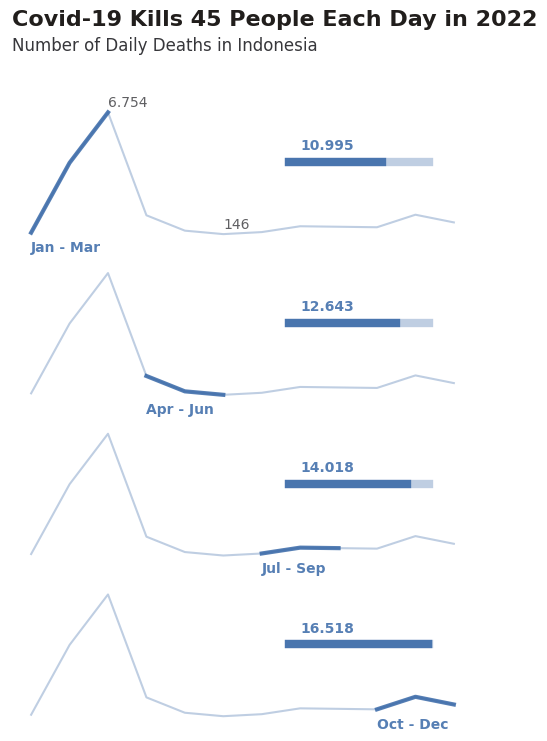

In [4]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(6, 8))
deaths_progress = 0

for i, ax in np.ndenumerate(axs):
    quarter = i[0] + 1
    covid_deaths_in_quarter = covid_deaths.loc[covid_deaths.quarter == quarter]

    ax.plot(covid_deaths.month, covid_deaths.New_deaths, 
            color='#2c5fa2', alpha=0.3)
    
    ax.plot(covid_deaths_in_quarter.month, covid_deaths_in_quarter.New_deaths,
            color='#2c5fa2', alpha=0.8, linewidth=3)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(bottom=False, left=False) # remove the ticks

    if i[0] == 0: # first axes
        min_deaths = covid_deaths.New_deaths.min()
        max_deaths = covid_deaths.New_deaths.max()

        x_min = covid_deaths.loc[covid_deaths.New_deaths == min_deaths, "month"].values[0]
        x_max = covid_deaths.loc[covid_deaths.New_deaths == max_deaths, "month"].values[0]
        
        ax.text(x=0.5,
                y=1.7 * max_deaths,
                s="Covid-19 Kills 45 People Each Day in 2022",
                weight='bold', 
                size=16,
                color='#211e1c')
        
        ax.text(x=0.5,
                y=1.5 * max_deaths,
                s="Number of Daily Deaths in Indonesia",
                size=12,
                color='#37373b')

        ax.text(x=x_min, 
                y=0.05 * max_deaths if min_deaths == 0 else max_deaths * (min_deaths / max_deaths + 0.05),
                s=f"{min_deaths:,}".replace(',', '.'),
                color='#37373b',
                alpha=0.8)
        
        ax.text(x=x_max, 
                y=1.05 * max_deaths,
                s=f"{max_deaths:,}".replace(',', '.'),
                color='#37373b',
                alpha=0.8)
    
    x_min_quarter = covid_deaths_in_quarter.month.min()
    y_min_quarter = covid_deaths_in_quarter.New_deaths.min()

    ax.text(x=x_min_quarter,
            y=max_deaths * (y_min_quarter / max_deaths - 0.15),
            s=month_in_quarter[quarter],
            color='#2c5fa2',
            alpha=0.8,
            weight='bold')
    
    deaths_in_year = covid_deaths.New_deaths.sum()
    deaths_in_quarter = covid_deaths_in_quarter.New_deaths.sum()

    deaths_progress += deaths_in_quarter
    progress_chart = 0.6 + 0.3 * (deaths_progress / deaths_in_year)

    ax.axhline(y=max_deaths * 0.6, xmin=0.6, xmax=0.9, linewidth=6, color='#2c5fa2', alpha=0.3)
    ax.axhline(y=max_deaths * 0.6, xmin=0.6, xmax=progress_chart, linewidth=6, color='#2c5fa2', alpha=0.8)
    
    ax.text(x=8, 
            y=max_deaths * 0.7,
            s=f'{deaths_progress:,}'.replace(',', '.'),
            color='#2c5fa2',
            alpha=0.8,
            weight='bold')
    
plt.show()